__Autor__
1. David Montaño Castro 

<h1><center>REGRESIÓN MÚLTIPLE: AUTOMÓVILES</center></h1>

Base de datos que corresponde a 30 registros de automóviles con diferentes características. Se tratará de estimar el valor Y por medio de una regresión lineal múltiple.

### Cargar los datos

In [1]:
Automoviles<-read.csv(choose.files())
names(Automoviles)[names(Automoviles) == 'ï..Y'] <- 'Y'
attach(Automoviles)

### Visualización de los datos

In [23]:
head(Automoviles)

Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
18.9,350,165,260,8.0,2.6,4,3,200.3,69.9,3910
17.0,350,170,275,8.5,2.6,4,3,199.6,72.9,2860
20.0,250,105,185,8.3,2.7,1,3,196.7,72.2,3510
18.3,351,143,255,8.0,3.0,2,3,199.9,74.0,3890
20.1,225,95,170,8.4,2.8,1,3,194.1,71.8,3365
11.2,440,215,330,8.2,2.9,4,3,184.5,69.0,4215


### Pairplot de las variables
Se pueden observar algunas relaciones lineales entre variables independientes, lo cual no es positivo para el modelo. Con respecto a la variable dependiente, se logran observar variables relacionadas de manera lineal negativamente.

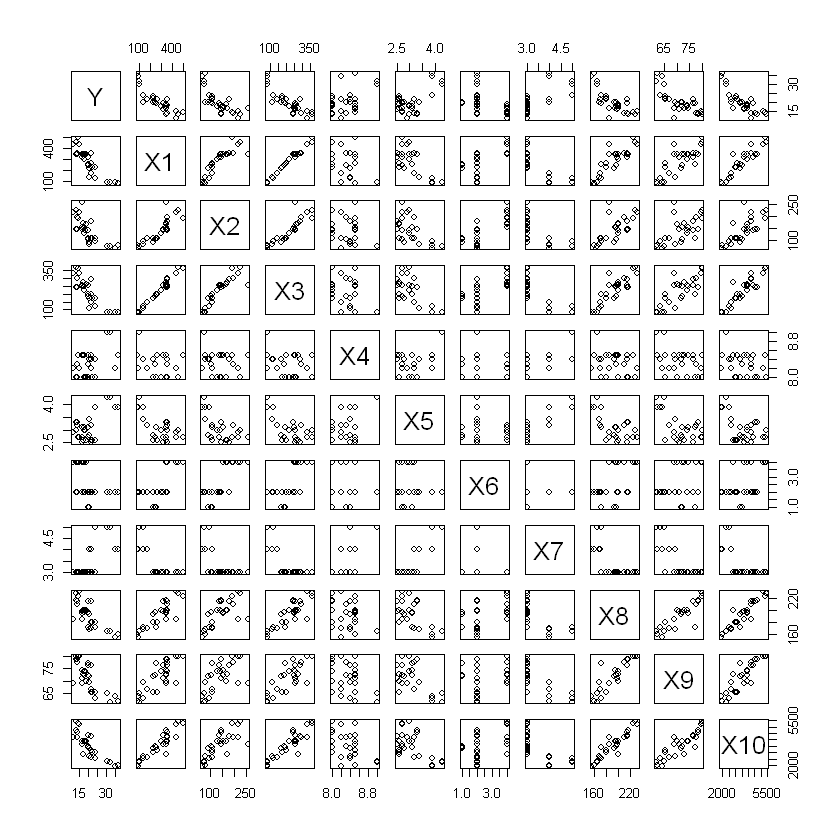

In [3]:
pairs(Automoviles)

### Matriz de correlaciones
La matriz de correlaciones es diferente a la que se calcula en SPSS. Los valores importantes a analizar en esta matriz son todos aquellos que están presentes en la columna Y dado que estas son los coeficientes que denotan el grado de correlación lineal entre la las variables independientes y la dependiente.

In [4]:
MATRIZ_COR<-cor(Automoviles)
data.frame(MATRIZ_COR)

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Y,1.0000000,-0.8716435,-0.7559378,-0.8493416,0.41692146,0.6360144,-0.47192100,0.7078714,-0.7523967,-0.7624550,-0.8267794
X1,-0.8716435,1.0000000,0.8856031,0.9896596,-0.34786259,-0.6751908,0.64022744,-0.7717597,0.8647101,0.7999204,0.9237046
X2,-0.7559378,0.8856031,1.0000000,0.9001971,-0.21772052,-0.5449683,0.77258741,-0.5977799,0.7046218,0.6157678,0.7754659
X3,-0.8493416,0.9896596,0.9001971,1.0000000,-0.32327112,-0.6759881,0.65312630,-0.7461800,0.8641224,0.7881284,0.9095154
X4,0.4169215,-0.3478626,-0.2177205,-0.3232711,1.00000000,0.4066149,0.03677956,0.5529563,-0.2983826,-0.3714382,-0.3766065
X5,0.6360144,-0.6751908,-0.5449683,-0.6759881,0.40661491,1.0000000,-0.22462742,0.8664510,-0.5632683,-0.4558166,-0.5452682
X6,-0.4719210,0.6402274,0.7725874,0.6531263,0.03677956,-0.2246274,1.00000000,-0.2756386,0.4220680,0.3003862,0.4668902
X7,0.7078714,-0.7717597,-0.5977799,-0.7461800,0.55295628,0.8664510,-0.27563863,1.0000000,-0.6552065,-0.6551300,-0.6807562
X8,-0.7523967,0.8647101,0.7046218,0.8641224,-0.29838259,-0.5632683,0.42206800,-0.6552065,1.0000000,0.8831512,0.9337872
X9,-0.7624550,0.7999204,0.6157678,0.7881284,-0.37143825,-0.4558166,0.30038618,-0.6551300,0.8831512,1.0000000,0.8814091


### Coeficientes de la regresión
Se puede notar que varias de estas variables no tienen mucho que aportar al modelo. Las variables más destacadas son:
1. X4
2. X5
3. X7

Las demás podrían rechazarse por medio de una penalización tipo __Lasso__ para reducir la dimensionalidad del modelo.

In [26]:
MODELO<-lm(Y~X1+X2+X3+X4+X5+X6+X7+X8+X9+X10)
MODELO
# COEFICIENTES<-coefficients(MODELO)
# COEFICIENTES


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    X10)

Coefficients:
(Intercept)           X1           X2           X3           X4           X5  
 25.1788434   -0.0818736   -0.0195821    0.0706018    2.5608749    4.5228839  
         X6           X7           X8           X9          X10  
  0.1357135   -3.5709118    0.0901807   -0.4664714   -0.0005742  


### Matriz de covarianzas de coeficientes del modelo
Esta matriz sí es igual a la que SPSS proporciona. En general se ven valores muy pequeños de covarianza en el modelo, llegando a ser casi despreciables. El intercepto es aquel que tiene los valores de covarianza más grande con respecto a todas las variables del modelo.

In [6]:
vcov(MODELO)

,(Intercept),X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
(Intercept),652.31438358,-1.091149e-01,-1.171684e-01,1.997657e-01,-5.433155e+01,-0.761554369,2.6647305248,1.621688668,-0.2159685655,-2.947024e+00,1.282069e-02
X1,-0.10911491,2.308462e-03,1.730622e-04,-2.386368e-03,-1.392046e-02,-0.008183056,-0.0170104070,0.051331232,0.0010640249,1.275623e-04,-7.095067e-05
X2,-0.11716842,1.730622e-04,1.252527e-03,-7.130476e-04,-7.097619e-04,0.006248003,-0.0186379951,-0.001860556,0.0006701942,3.537534e-04,-1.827189e-05
X3,0.19976574,-2.386368e-03,-7.130476e-04,3.751112e-03,8.524693e-03,0.054507500,-0.0009083979,-0.052117127,-0.0011502097,-2.586243e-03,3.005922e-05
X4,-54.33155227,-1.392046e-02,-7.097619e-04,8.524693e-03,8.220066e+00,0.800099341,-0.2921300313,-2.921956524,-0.0542062628,-7.110796e-03,1.990606e-03
X5,-0.76155437,-8.183056e-03,6.248003e-03,5.450750e-02,8.000993e-01,9.722856871,-1.4868056503,-6.066765371,0.0950115546,-4.472800e-01,-2.360285e-03
X6,2.66473052,-1.701041e-02,-1.863800e-02,-9.083979e-04,-2.921300e-01,-1.486805650,1.4960563027,0.022214784,-0.0236190061,1.054425e-01,1.419273e-03
X7,1.62168867,5.133123e-02,-1.860556e-03,-5.211713e-02,-2.921957e+00,-6.066765371,0.0222147842,7.756527717,-0.0310403510,3.085563e-01,-1.030498e-03
X8,-0.21596857,1.064025e-03,6.701942e-04,-1.150210e-03,-5.420626e-02,0.095011555,-0.0236190061,-0.031040351,0.0098211944,-1.221423e-02,-1.739588e-04
X9,-2.94702413,1.275623e-04,3.537534e-04,-2.586243e-03,-7.110796e-03,-0.447280005,0.1054424643,0.308556347,-0.0122142315,8.618812e-02,-6.876537e-05


### Intervalos de confianza al 95% para coeficientes del modelo

In [28]:
INTERVALOS<-confint(MODELO, level = 0.95)
INTERVALOS

,2.5 %,97.5 %
(Intercept),-28.277924531,78.635611285
X1,-0.182436028,0.018688752
X2,-0.093656478,0.054492208
X3,-0.057588256,0.198791803
X4,-3.439962574,8.561712453
X5,-2.003478243,11.049245955
X6,-2.424335020,2.695761927
X7,-9.400097558,2.258273925
X8,-0.117242046,0.297603441
X9,-1.080937528,0.147994634


### Prueba ANOVA
Definitivamente existe modelo de regresión con estas variables, pues los P-values de cada variable son, por mucho, menores a .5. Por lo tanto, existe sufiente prueba estadística para rechazar la hipótesis nula y presumir de la existencia del modelo.

In [29]:
ANOVA_MODELO<-anova(MODELO)
ANOVA_MODELO

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X1,1,864.17929046,864.17929046,79.806965990,3.133995e-08
X2,1,1.34859998,1.34859998,0.124543222,7.280432e-01
X3,1,8.41689422,8.41689422,0.777300265,3.889856e-01
X4,1,13.61075683,13.61075683,1.256953527,2.761993e-01
X5,1,2.58273872,2.58273872,0.238515946,6.308690e-01
X6,1,6.62706729,6.62706729,0.612009729,4.436733e-01
X7,1,6.45296919,6.45296919,0.595931768,4.496303e-01
X8,1,0.05379953,0.05379953,0.004968387,9.445428e-01
X9,1,28.02572098,28.02572098,2.588175609,1.241543e-01
X10,1,0.39681515,0.39681515,0.036645883,8.502187e-01


### Resumen del modelo

In [27]:
summary(MODELO)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    X10)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8218 -1.9717 -0.3245  1.6540  5.1839 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) 25.1788434 25.5404460   0.986    0.337
X1          -0.0818736  0.0480465  -1.704    0.105
X2          -0.0195821  0.0353911  -0.553    0.587
X3           0.0706018  0.0612463   1.153    0.263
X4           2.5608749  2.8670657   0.893    0.383
X5           4.5228839  3.1181496   1.451    0.163
X6           0.1357135  1.2231338   0.111    0.913
X7          -3.5709118  2.7850543  -1.282    0.215
X8           0.0901807  0.0991019   0.910    0.374
X9          -0.4664714  0.2935781  -1.589    0.129
X10         -0.0005742  0.0029993  -0.191    0.850

Residual standard error: 3.291 on 19 degrees of freedom
Multiple R-squared:  0.8191,	Adjusted R-squared:  0.7239 
F-statistic: 8.604 on 10 and 19 DF,  p-value: 3.669e-05


### Valores estimados vs reales
Se puede notar una buena estimación de los datos predichos, pues el _scatter plot_ muestra una tendencia lineal, que es lo deseable cuando se grafican estos dos valores.

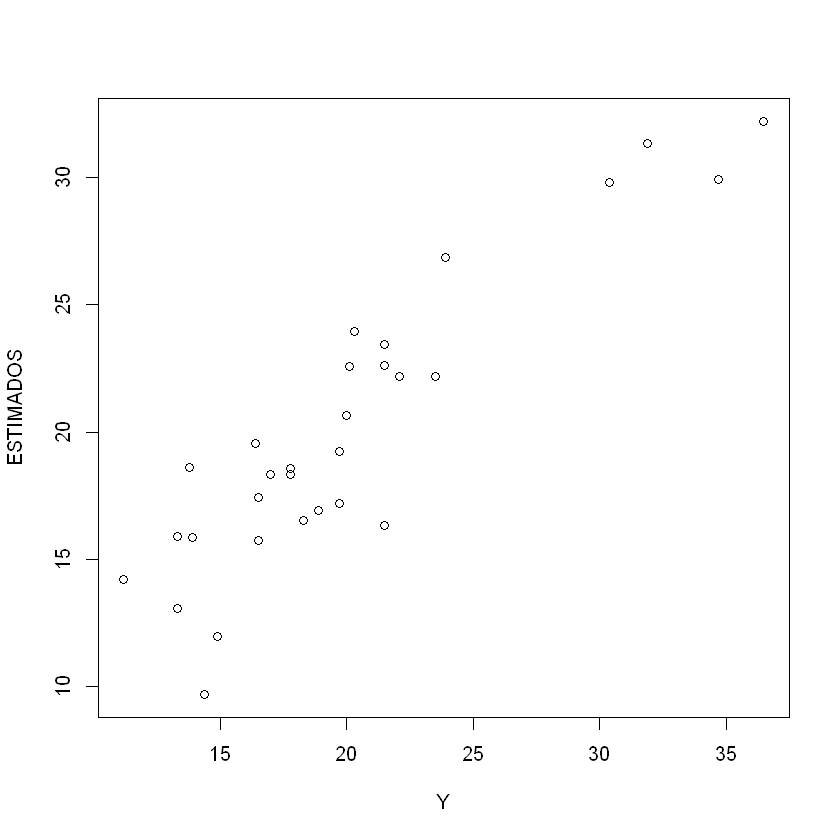

In [30]:
ESTIMADOS<-fitted(MODELO)
#ESTIMADOS
plot(Y,ESTIMADOS)

### $R^2$
El $R^2$ retrata un muy buen modelo de regresión; sin embargo, por tratarse de un modelo de regresión lineal múltiple, este no considera el número de variables que contiene el modelo, haciendolo un factor poco fiable pues este modelo contiene más de 2. 

In [11]:
cor(ESTIMADOS,Y)

[1] 0.9050525

### $R^2$ ajustada
El modelo es bueno, ahora sí considerando el ajuste del número de variables que contiene el modelo. El modelo describe el 85% de la varianza con repecto a la variable dependiente.

In [31]:
1-(((30-1)/(30-10-1))*(1-cor(ESTIMADOS,Y)))

[1] 0.8550801

In [33]:
VALORES<-data.frame(X1,X2,X3,X4,X5,X6,X7,X8,X9,X10)
head(VALORES)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
350,165,260,8.0,2.6,4,3,200.3,69.9,3910
350,170,275,8.5,2.6,4,3,199.6,72.9,2860
250,105,185,8.3,2.7,1,3,196.7,72.2,3510
351,143,255,8.0,3.0,2,3,199.9,74.0,3890
225,95,170,8.4,2.8,1,3,194.1,71.8,3365
440,215,330,8.2,2.9,4,3,184.5,69.0,4215


### Intervalos de confianza para valores medios de Y

In [34]:
IC_MEDIOS<-predict(MODELO,newdata=VALORES,interval="confidence",level=0.95)
head(IC_MEDIOS,10)

fit,lwr,upr
16.93696,13.011775,20.86215
18.31884,12.104000,24.53369
20.64966,17.691648,23.60767
16.53349,12.811397,20.25558
22.57704,19.438415,25.71567
14.22024,8.930553,19.50993
22.20069,18.856457,25.54493
22.61623,18.819438,26.41302
29.90216,26.142332,33.66198
29.79487,25.752666,33.83707


### Intervalos de confianza para valores puntuales de Y

In [35]:
IC_PUNTUALES<-predict(MODELO,newdata=VALORES,interval="prediction",level=0.95)
head(IC_PUNTUALES,10)

fit,lwr,upr
16.93696,9.009574,24.86435
18.31884,9.041955,27.59573
20.64966,13.153913,28.14541
16.53349,8.704674,24.36230
22.57704,15.008202,30.14588
14.22024,5.535935,22.90455
22.20069,14.544305,29.85708
22.61623,14.751624,30.48083
29.90216,22.055332,37.74898
29.79487,21.808895,37.78084


### Residuales

In [15]:
RESIDUALES<-residuals(MODELO)
RESIDUALES

1          2          3          4          5          6          7 
 1.9630401 -1.3188429 -0.6496594  1.7665109 -2.4770432 -3.0202399 -0.1006939 
         8          9         10         11         12         13         14 
-1.1162270  4.7978437  0.6051315 -0.9419901  4.3021339 -1.9474902  2.4904362 
        15         16         17         18         19         20         21 
-3.6628896 -0.5483851  4.7048466  2.9391164 -0.7711081 -3.1392064  1.3165310 
        22         23         24         25         26         27         28 
 5.1839413  0.5865856  0.2047512 -2.9365161  0.4420617 -1.9797141 -2.6152178 
        29         30 
-4.8217853  0.7440789

### Normalidad de los residuales vista desde un QQ-Plot
Se aprecian colas pesadas en la distribución, pues en los extreños de la linea existe una desviación de la linea central; además, la linea no está a 45° con respecto del intersecto (0,0)

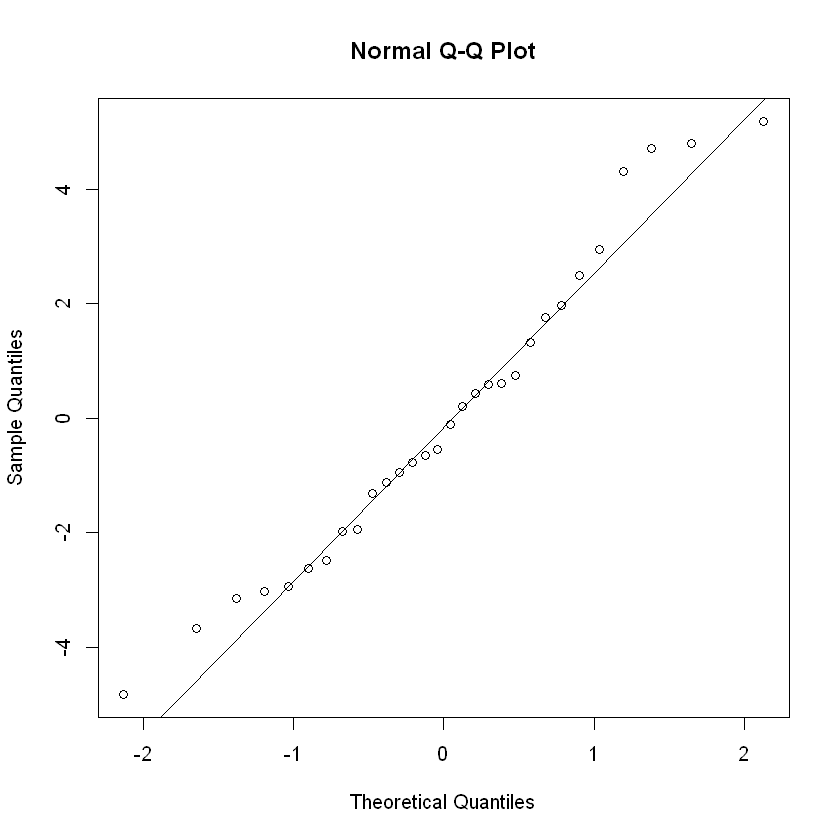

In [16]:
qqnorm(RESIDUALES)
qqline(RESIDUALES)

### Prueba Jarque-Bera para normalidad de los residuos. Prueba No Paramétrica.
El p-valor obtenido por la prueba de Jarque-bera es, por mucho, mayor a .05. Por lo tanto, no se rechaza la hipótesis nula y podemos afirmar que estos datos provienen de una distribución normal.

In [19]:
#install.packages("tseries")
#library("tseries")
jarque.bera.test(RESIDUALES)


	Jarque Bera Test

data:  RESIDUALES
X-squared = 1.1563, df = 2, p-value = 0.5609


### Residuales estudentizados
El criterio para decidir si un punto está alejado o es atípico:<br>
Si el punto |x| > 2, entonces es un punto alejado, ya sea un punto de influencia o un punto palanca. Se pueden apreciar varios puntos que se acercan a 2 o -2, pero que aún así no logran superarlo. Se concluye por medio de los resituales estudentizados que no hay valores alejados.

In [37]:
RESESTUDENT<-rstandard(MODELO)
RESESTUDENT

1           2           3           4           5           6 
 0.72598842 -0.92988117 -0.21861500  0.63802056 -0.84566488 -1.43315593 
          7           8           9          10          11          12 
-0.03500327 -0.40656795  1.74019370  0.22712499 -0.33967459  1.62246357 
         13          14          15          16          17          18 
-0.68174503  1.37293608 -1.42021107 -0.17691298  1.91546143  1.06043926 
         19          20          21          22          23          24 
-0.27268248 -1.08489270  0.45903851  1.88934057  0.22708463  0.08398342 
         25          26          27          28          29          30 
-1.20946462  0.15997045 -0.74419092 -0.96307136 -1.91193502  0.69213959

### Distancia de Cook
Vemos que solamente un punto es infuyente en el modelo. El registro 7 tiene una D mayor a 1.

In [38]:
COOK<-cooks.distance(MODELO)
COOK

1            2            3            4            5            6 
0.0230483397 0.3445425253 0.0009826686 0.0152664913 0.0170398080 0.2685404236 
           7            8            9           10           11           12 
0.0000343622 0.0065602347 0.1168670891 0.0024640811 0.0042792978 0.1292470243 
          13           14           15           16           17           18 
0.0138146645 0.3925648653 0.1151295071 0.0003612577 0.2651053614 0.0418751856 
          19           20           21           22           23           24 
0.0023934999 0.0313821238 0.0060616216 0.1422476039 0.0029198424 0.0005269303 
          25           26           27           28           29           30 
0.1112923429 0.0009724454 0.0266903379 0.0395005810 0.2334616393 0.3644935278

### Distancia de Mahalanobis

HAT<-hatvalues(MODELO)

MAHA<-(9-1)*(HAT-1/9)
MAHA